## weekdays_datasets

In [3]:
import pandas as pd
import numpy as np
import sys
import os

# Allows importing modules defined inside the project directory:
path = os.path.abspath(os.path.curdir)
while len(path) > 1 and not path.endswith('Mestrado'):
    path = os.path.abspath(os.path.join(path, '..'))
if path not in sys.path:
    sys.path.append(path)
sys.path.append('./MultiRocket')
print(sys.path)


['/Users/carolina/Desktop/Mestrado', '/Users/carolina/anaconda3/lib/python310.zip', '/Users/carolina/anaconda3/lib/python3.10', '/Users/carolina/anaconda3/lib/python3.10/lib-dynload', '', '/Users/carolina/anaconda3/lib/python3.10/site-packages', '/Users/carolina/anaconda3/lib/python3.10/site-packages/PyQt5_sip-12.11.0-py3.10-macosx-10.9-x86_64.egg', '/Users/carolina/anaconda3/lib/python3.10/site-packages/aeosa', '/Users/carolina/anaconda3/lib/python3.10/site-packages/mpmath-1.2.1-py3.10.egg', '/Users/carolina/anaconda3/lib/python3.10/site-packages/pycurl-7.45.1-py3.10-macosx-10.9-x86_64.egg', './MultiRocket']


In [4]:
df = pd.read_csv('weekdays_datasets/df_timeseries.csv')

Colunas CSV em weekdays_dataset.zip

h00-h23: Faixa de popularidade (0-1) entre meia-noite e onze da noite

country: 0 - Brasil, 1 - Estados Unidos

city: 0 - Curitiba, 1 - Rio de Janeiro, 2 - São Paulo, 0 - Chicago, 1 - New York, 2 - San Francisco

category: 0 - bakeries, 1 - bars, 2 - coffee, 3 - dance clubs, 4 - restaurants

In [5]:
df

,id,h00,h01,h02,h03,h04,h05,h06,h07,h08,...,h17,h18,h19,h20,h21,h22,h23,country,city,category
0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.347754,0.522437,0.940441,0.823425,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.320058,0.212006,0.212006,0.212006,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.805263,0.483633,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.080787,0.303251,0.519247,...,0.986970,0.917125,0.562874,0.378466,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.060529,0.172893,...,0.878997,0.994609,0.901742,0.667729,0.387283,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12699,12699,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.430487,0.759348,0.991525,0.870099,0.588773,0.000000,0.000000,1.0,4.0,4.0
12700,12700,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.192508,0.564814,0.973335,0.966669,0.548366,0.000000,0.000000,1.0,4.0,4.0
12701,12701,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.571624,0.201609,0.144007,0.334674,0.000000,0.000000,0.000000,1.0,4.0,4.0
12702,12702,0.474252,0.256943,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.341396,0.630530,0.810973,0.971333,1.000000,0.897192,0.743494,1.0,4.0,4.0


In [107]:
from sklearn.model_selection import train_test_split

def extract_x_y(df, country, city,category=None):
    if category is None:
        filtered_df = df[(df['country'] == country) & (df['city'] == city)]
    else:
        filtered_df = df[(df['country'] == country) & (df['city'] == city) & (df['category'] == category)]

    df_x = filtered_df.drop(columns=['id','country', 'city', 'category'])

    return np.array(df_x),np.array(filtered_df['category'])

X, y = extract_x_y(df,0,0)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape)

(816, 24) (273, 24)


In [7]:
dfs = pd.read_csv('weekdays_datasets/df_signatures.csv')
dfs

,id,h00,h01,h02,h03,h04,h05,h06,h07,h08,...,h17,h18,h19,h20,h21,h22,h23,country,city,category
0,0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000119,...,0.896498,0.808148,0.462531,0.010060,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.003126,0.031889,0.234067,...,0.677492,0.475074,0.385600,0.248011,0.017268,0.000000,0.000000,0.0,0.0,0.0
2,2,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000174,0.009180,0.138568,...,0.972788,0.965489,0.831592,0.573811,0.275817,0.002511,0.000106,0.0,0.0,0.0
3,3,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.001596,0.043055,0.531299,...,0.775702,0.628683,0.533388,0.353358,0.008911,0.000000,0.000000,0.0,0.0,0.0
4,4,0.000000,0.000000,0.000000,0.00000,0.00000,0.000467,0.015091,0.179335,0.768777,...,0.412289,0.603218,0.448638,0.349549,0.154791,0.030829,0.000874,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,66,0.497889,0.302093,0.001882,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000041,0.005409,0.075049,0.140844,0.265839,0.581515,1.0,4.0,3.0
67,67,0.804521,0.541695,0.005939,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.076270,0.183042,0.224729,0.324142,0.479679,0.725018,0.896602,1.0,4.0,3.0
68,68,0.518485,0.394968,0.019825,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.556677,0.665041,0.706486,0.850784,0.827417,0.919327,0.747429,1.0,4.0,3.0
69,69,0.024066,0.000008,0.000000,0.00000,0.00002,0.000000,0.000000,0.000000,0.002157,...,0.327476,0.501589,0.829388,0.633860,0.500545,0.039253,0.019268,1.0,4.0,4.0


In [8]:
Xs, ys = extract_x_y(dfs,0,0)
Xs.shape

(15, 24)

HIVECOTEV2

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [9]:
from sktime.classification.hybrid import HIVECOTEV2
from sktime.classification.sklearn import RotationForest
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

hc2_classifier = HIVECOTEV2(
    stc_params={
        "estimator": RotationForest(n_estimators=3),
        "n_shapelet_samples": 100,
        "max_shapelets": 10,
        "batch_size": 20,
    },
    drcif_params={"n_estimators": 2, "n_intervals": 2, "att_subsample_size": 2},
    arsenal_params={"num_kernels": 50, "n_estimators": 3},
    tde_params={
        "n_parameter_samples": 10,
        "max_ensemble_size": 3,
        "randomly_selected_params": 5,
    },
)
hc2_classifier.fit(X_train, y_train)
print("predicting...")
hc2_pred = hc2_classifier.predict(X_test)
print("results...")
print(accuracy_score(y_test, hc2_pred))
print(f1_score(y_test, hc2_pred, average='weighted'))

predicting...
results...
0.7619047619047619
0.7453050189201792


In [19]:
print(precision_score(y_test, hc2_pred, average='weighted'))
print(recall_score(y_test, hc2_pred, average='weighted'))

0.7488065017786162
0.7619047619047619


validating signatures

In [51]:
hc2_pred_sig = hc2_classifier.predict(Xs)
print("validating signatures...")
accuracy_score(ys, hc2_pred_sig)

validating signatures...


0.4

Hydra

In [10]:
import torch

X_train_tensor = torch.tensor(np.expand_dims(X_train, axis=1), dtype=torch.float32)
X_test_tensor = torch.tensor(np.expand_dims(X_test, axis=1), dtype=torch.float32)
X_train_tensor.shape

torch.Size([816, 1, 24])

In [11]:
from hydra import Hydra, SparseScaler
from sklearn.linear_model import RidgeClassifierCV

transform = Hydra(X_train.shape[-1])

X_training_transform = transform(X_train_tensor)
X_test_transform = transform(X_test_tensor)

scaler = SparseScaler()

X_training_transform = scaler.fit_transform(X_training_transform)
X_test_transform = scaler.transform(X_test_transform)

hydra_classifier = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10))
hydra_classifier.fit(X_training_transform, y_train)

hydra_pred = hydra_classifier.predict(X_test_transform)
print(accuracy_score(y_test, hydra_pred))
print(f1_score(y_test, hydra_pred, average='weighted'))

0.7875457875457875
0.7743897900319882


In [20]:
print(precision_score(y_test, hydra_pred, average='weighted'))
print(recall_score(y_test, hydra_pred, average='weighted'))

0.7748221240942406
0.7875457875457875


/Users/carolina/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
hydra_pred_sig = hydra_classifier.predict(transform(torch.tensor(np.expand_dims(Xs, axis=1), dtype=torch.float32)))
accuracy_score(ys, hydra_pred_sig)

0.4

In [12]:
from multirocket.multirocket import MultiRocket
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# returns ntc format, remove the last dimension
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))

nb_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))

mrocket_classifier = MultiRocket(
    num_features=50000,
    classifier="logistic",
    verbose=2,
)
yhat_train = mrocket_classifier.fit(
    X_train, y_train,
    predict_on_train=False
)
mrocket_pred = mrocket_classifier.predict(X_test)
print(accuracy_score(y_test, mrocket_pred))
print(f1_score(y_test, mrocket_pred, average='weighted'))

[MultiRocket] Creating MultiRocket with 6250 kernels
[MultiRocket] Training with training set of (816, 24)
[MultiRocket] Kernels applied!, took 1.698367197997868s
[MultiRocket] Transformed Shape (816, 49728)
[MultiRocket] Training


epoch: 0: 4it [00:00,  7.78it/s]                       
epoch: 1: 4it [00:00, 33.08it/s]                       
epoch: 2: 4it [00:00, 32.22it/s]                       
epoch: 3: 4it [00:00, 33.48it/s]                       
epoch: 4: 4it [00:00, 31.57it/s]                       
epoch: 5: 4it [00:00, 32.46it/s]                       
epoch: 6: 4it [00:00, 29.03it/s]                       
epoch: 7: 4it [00:00, 30.87it/s]                       
epoch: 8: 4it [00:00, 34.21it/s]                       
epoch: 9: 4it [00:00, 33.36it/s]                       
epoch: 10: 4it [00:00, 32.80it/s]                       
epoch: 11: 4it [00:00, 30.37it/s]                       
epoch: 12: 4it [00:00, 32.46it/s]                       
epoch: 13: 4it [00:00, 33.81it/s]                       
epoch: 14: 4it [00:00, 30.07it/s]                       
epoch: 15: 4it [00:00, 30.20it/s]                       
epoch: 16: 4it [00:00, 31.31it/s]                       
epoch: 17: 4it [00:00, 20.46it/s]        


<Stopped at Epoch 27>
[MultiRocket] Training done!, took 5.331s
[MultiRocket] Predicting
Kernels applied!, took 0.135s. Transformed shape: (273, 49728).
[MultiRocket] Predicting completed, took 0.144s
0.6996336996336996
0.7078446121734016


In [21]:
print(precision_score(y_test, mrocket_pred, average='weighted'))
print(recall_score(y_test, mrocket_pred, average='weighted'))

0.7383084602472357
0.6996336996336996


In [59]:
mrocket_pred_sig = mrocket_classifier.predict(Xs)
accuracy_score(ys, mrocket_pred_sig)

[MultiRocket] Predicting
Kernels applied!, took 0.029s. Transformed shape: (15, 49728).
[MultiRocket] Predicting completed, took 0.037s


0.5333333333333333

In [ ]:
from sktime.registry import all_estimators

all_estimators("classifier", as_dataframe=True)

## genetic algorithms

In [87]:
from scipy.optimize import minimize

N = 1
categ = 4
# X_ini = np.random.rand(N*24)
X_cat, y_cat = extract_x_y(df,0,0,categ)
X_avg = X_cat.mean(axis=0)
X_avg = np.pad(X_avg, ((2,2)), mode='constant', constant_values=0)

def fitness(X):
    X_np = np.array(X)
    X_sig = transform(torch.tensor(np.expand_dims(
        X_np.reshape(N,24),
        axis=1
    ), dtype=torch.float32))

    violated_constraints = np.maximum(0, X_np - 1.0) + np.maximum(0, 0.0 - X_np)
    penalty = sum(violated_constraints)
    distance = np.mean([np.min([np.linalg.norm(X_avg[x:x+24] - row) for x in range(5)]) for row in X_np.reshape(N, 24)])

    y = hydra_classifier.predict(X_sig)
    
    return accuracy_score([categ]*N, y), - penalty, - distance

# return accuracy_score([0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5], y)
# return accuracy_score([0,1,2,3,4,5], y)
# res = minimize(fitness, X_ini, method = 'Nelder-Mead', options={'maxiter':100, 'disp':True,'fatol':0})
# res

In [234]:
# fitness(X_ini)

(0.0, -0.0, 130.93682658688874)

In [88]:
import numpy as np
import pygad

num_generations = 1000
num_parents_mating = 10
sol_per_pop = 50
num_genes = N*24

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=lambda ga, sol, i: fitness(sol),
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=0.0,
                       init_range_high=1.0,
                       random_mutation_min_val=-0.1,
                       random_mutation_max_val=0.1)

ga_instance.run()

print("Best solution:", ga_instance.best_solution())


/Users/carolina/anaconda3/lib/python3.10/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Best solution: (array([4.16247245e-02, 3.04086157e-02, 5.25050833e-02, 5.23175301e-02,
       8.41533228e-03, 1.66328097e-04, 3.33238410e-03, 1.49951703e-02,
       2.81648238e-02, 7.12748730e-02, 6.54947204e-01, 4.80571089e-01,
       4.56705866e-01, 2.56682595e-01, 1.50555135e-01, 2.09904612e-01,
       1.88208693e-01, 2.34301312e-01, 3.96406699e-01, 4.83073073e-01,
       5.21281819e-01, 1.12868663e+00, 3.57856384e-01, 1.04058224e-02]), array([ 1.        , -0.12868663, -0.09133861]), 0)


In [89]:
ga_instance.best_solution()

(array([4.16247245e-02, 3.04086157e-02, 5.25050833e-02, 5.23175301e-02,
        8.41533228e-03, 1.66328097e-04, 3.33238410e-03, 1.49951703e-02,
        2.81648238e-02, 7.12748730e-02, 6.54947204e-01, 4.80571089e-01,
        4.56705866e-01, 2.56682595e-01, 1.50555135e-01, 2.09904612e-01,
        1.88208693e-01, 2.34301312e-01, 3.96406699e-01, 4.83073073e-01,
        5.21281819e-01, 1.12868663e+00, 3.57856384e-01, 1.04058224e-02]),
 array([ 1.        , -0.12868663, -0.09133861]),
 0)

In [81]:
ga_instance.num_generations = 9000
ga_instance.run()
ga_instance.best_solution()

(array([ 5.46944954e-01,  5.26806322e+01,  1.83465219e-01,  2.74667180e+01,
         5.64513407e-02,  2.63797925e-02,  5.23544331e-02, -2.04524092e-02,
         4.93594479e-02,  2.62616546e-02, -4.04692241e-02, -1.37356289e-02,
         4.43397657e-02,  8.18210760e-02, -1.95037527e-02, -2.23579845e-02,
         1.79466506e-02,  6.77089101e-02,  2.32786422e-02,  3.88685292e-02,
         1.76799080e-01,  3.21938516e-01,  8.36681933e-02,  9.50888062e-02]),
 array([  1.        , -78.26386922,  -0.25194653]),
 3)

In [82]:
sorted(ga_instance.last_generation_fitness,key=lambda x: x[0])

[array([  0.        ,  -1.41546584, -56.92611833]),
 array([  0.        ,  -0.18383346, -58.11232558]),
 array([  0.        ,  -0.18049151, -58.0794686 ]),
 array([  0.        ,  -0.16070508, -58.07467507]),
 array([  0.        , -28.07736137, -50.12604016]),
 array([  0.        ,  -1.51885073, -56.92624906]),
 array([  0.        ,  -0.12792826, -58.11232965]),
 array([ 0.00000000e+00, -2.37488626e-02, -5.81088693e+01]),
 array([  0.        ,  -1.49581996, -56.92624338]),
 array([  0.        ,  -0.15873586, -58.11241399]),
 array([  0.        ,  -0.1760071 , -58.10881733]),
 array([  0.        , -28.15941101, -50.12610195]),
 array([  0.        , -28.0683204 , -50.20920956]),
 array([  0.        ,  -1.45678592, -56.92625747]),
 array([  0.        ,  -0.07962053, -58.08449087]),
 array([  0.        , -28.08991123, -50.1261175 ]),
 array([  0.        ,  -1.47246413, -56.92630037]),
 array([  0.        , -26.60253754, -51.69826368]),
 array([  0.        ,  -0.18780773, -58.0748694 ]),
 ar

In [90]:
ga_instance.generations_completed

1000

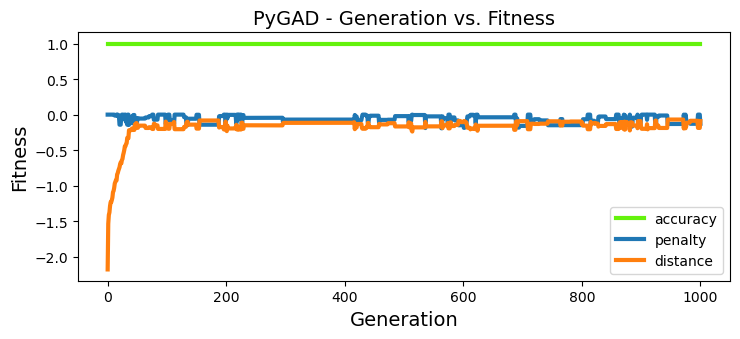

In [91]:
fig = ga_instance.plot_fitness(label=['accuracy','penalty','distance'])
fig.legend()

In [92]:
ga_instance.last_generation_fitness

array([[ 1.        , -0.12868663, -0.09133861],
       [ 1.        , -0.08890353, -0.20296382],
       [ 1.        , -0.        , -0.21225864],
       [ 1.        , -0.10456318, -0.13662164],
       [ 1.        , -0.04862045, -0.16546243],
       [ 1.        , -0.10322596, -0.1698113 ],
       [ 1.        , -0.02052479, -0.17755984],
       [ 1.        , -0.12461594, -0.21199395],
       [ 1.        , -0.        , -0.2306374 ],
       [ 1.        , -0.12868663, -0.11647061],
       [ 1.        , -0.12868663, -0.14730366],
       [ 1.        , -0.        , -0.19299535],
       [ 1.        , -0.07564119, -0.17624102],
       [ 1.        , -0.10456318, -0.10854178],
       [ 1.        , -0.04862045, -0.18928604],
       [ 1.        , -0.07318337, -0.14897988],
       [ 1.        , -0.09866418, -0.20269919],
       [ 1.        , -0.01323881, -0.18823973],
       [ 1.        , -0.        , -0.22855919],
       [ 1.        , -0.15336885, -0.11840785],
       [ 1.        , -0.12868663, -0.104

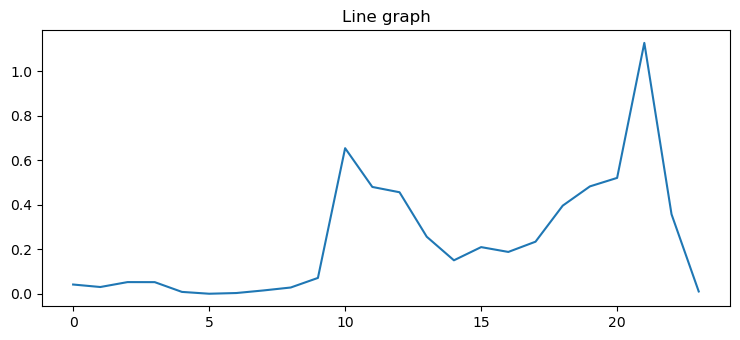

In [93]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = range(24)
y,fit,idx = ga_instance.best_solution()

plt.title("Line graph")
for y_ in np.array(y).reshape(N,24):
    plt.plot(x, y_)

plt.show()

In [94]:
ga_instance.save('ga_1sig_ng100_npm10_spp50_categ4_1000')

TRANSFORMERS
DTW VS TRANSFORMERS TIME SERIES
MÉTRICAS (f1-score)

OVERLEAF

ESTUDO (RELATÓRIO)
- CLASSIFICADORES (NOVAS TÉCNICAS)
- DEEP LEARNING (SUMARIZAÇÃO)
- OUTRAS TÉCNICAS (SUMARIZAÇÃO / LEVANTAMENTO)
- TESTES-PILOTO 
- USO DAS ASSINATURAS (parâmetros dos classificadores (talvez))

- aplicar em outros datasets

In [219]:
#teste
import numpy as np

# Define input signal and kernel
signal = np.array([0, 0, 1, 2, 3, 4, 5, 0, 0])
kernel = np.array([0, 0.5, 1, 1.5, 0])

# Perform 1D convolution
result = np.correlate(signal, kernel, mode='valid')

print("Convolution result:", result)
result.max()


13.0

In [17]:
#teste
two_d = np.array([
    [1,2],
    [3,4]
])

np.mean([np.correlate(
    np.array([1,2,3,4]),
    row
).max() for row in two_d])

18.0

## Reunião 16/02

*verificar se é bom ou não o uso de algoritmos genéticos

*comparar com a geração simples de signature pela média do dataframe

*ver os transformers

*ver se tem mais classificadores interessantes

*M2 do Leonardo (ver se eu consigo implementar no meu tbm)

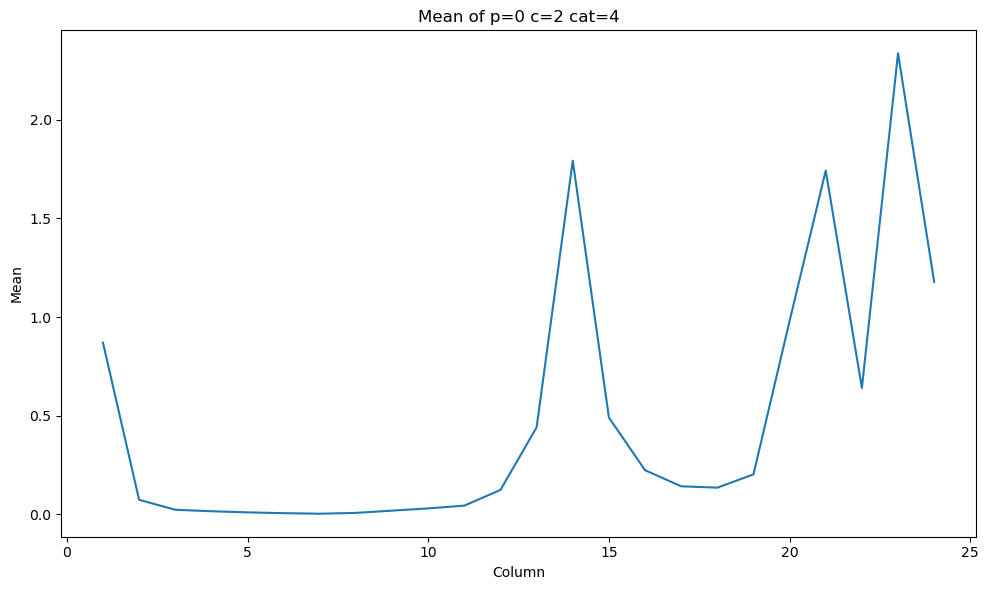

In [134]:
import numpy as np
import matplotlib.pyplot as plt

df_filtrado = df[(df['country'] == 0) & (df['city'] == 2) & (df['category'] == 4)]
df_teste = df_filtrado.drop(columns=['id','country', 'city', 'category'])

column_means = np.mean(df_teste, axis=0)

# Create a bar plot to visualize the mean of each column
plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), column_means)

# Add labels and title
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('Mean of p=0 c=2 cat=4')

# Show the plot
plt.show()